# Recurrent Neural Network

## Part 1 - Data Preprocessing

### Importing the libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Importing the training set

In [ ]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')
training_set=dataset_train.iloc[ : ,1:2].values

In [ ]:
print(training_set)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
training_set_scaled=sc.fit_transform(training_set)

In [ ]:
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


### Creating a data structure with 60 timesteps and 1 output

In [ ]:
X_train=[]
y_train=[]
for i in range (60,1258):
  X_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)

In [ ]:
print(X_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]


### Reshaping

In [ ]:
X_train=np.reshape(X_train,(X_train.shape[0], X_train.shape[1],1))

## Part 2 - Building and Training the RNN

### Importing the Keras libraries and packages

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

### Initialising the RNN

In [ ]:
regressor=Sequential()

### Adding the first LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50,return_sequences=True,input_shape=( X_train.shape[1],1)))
regressor.add(Dropout(0.2))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


### Adding a second LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a third LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))

### Adding a fourth LSTM layer and some Dropout regularisation

In [ ]:
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

### Adding the output layer

In [ ]:
regressor.add(Dense(units=1))

### Compiling the RNN

In [ ]:
regressor.compile(optimizer='adam',loss='mean_squared_error')

### Fitting the RNN to the Training set

In [ ]:
regressor.fit(X_train,y_train,epochs=100,batch_size=32)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 123ms/step - loss: 0.0999
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0079
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 143ms/step - loss: 0.0061
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 116ms/step - loss: 0.0046
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 156ms/step - loss: 0.0055
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms/step - loss: 0.0053
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 139ms/step - loss: 0.0047
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.0048
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0041
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 161ms/step - loss: 0.0038
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 115ms/step - loss: 0.0044
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 150ms/step - loss: 0.0045
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 129ms/step - loss: 0.0039
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 135ms/step - loss: 0.0045
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 

## Part 3 - Making the predictions and visualising the results

### Getting the real stock price of 2017

In [ ]:
dataset_test=pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price=dataset_test.iloc[ : ,1:2]

In [ ]:
print(real_stock_price)

      Open
0   778.81
1   788.36
2   786.08
3   795.26
4   806.40
5   807.86
6   805.00
7   807.14
8   807.48
9   807.08
10  805.81
11  805.12
12  806.91
13  807.25
14  822.30
15  829.62
16  837.81
17  834.71
18  814.66
19  796.86


### Getting the predicted stock price of 2017

In [ ]:
dataset_total=pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs=dataset_total[len(dataset_total)-len(dataset_test)-60: ].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)
X_test=[]
for i in range(60,80):
  X_test.append(inputs[i-60:i,0])
X_test=np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [ ]:
predicted_stock_price=regressor.predict(X_test)
predicted_stock_price=sc.inverse_transform(predicted_stock_price)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 560ms/step


### Visualising the results

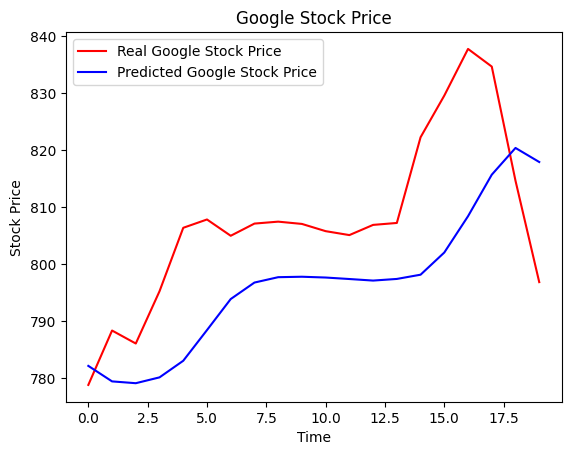

In [ ]:
plt.plot(real_stock_price,color='#8B008B',label='Real Google Stock Price')
plt.plot(predicted_stock_price,color='blue',label='Predicted Google Stock Price')
plt.ylabel('Stock Price')
plt.xlabel('Time')
plt.title('Google Stock Price')
plt.legend()
plt.show()